In [1]:
import time
import json
import bz2
import pandas as pd
import numpy as np
import re
from pathlib import Path
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import glob
#import jsonlines

In [2]:
###  IMPORTING DATA ###

# Define the path where the data is located

Path = "../quotes-2015.json.bz2" #goes out of the current folder


To decrease the running time, we uploaded and filtered the different year's data one by one. Here is how it was done for the year 2020. We just changed the path and the name of the output cvs file for the different years.

In [3]:
#Filtering functions

def find_proba(text):
    num = re.findall(r'-?\d+\.?\d*',text)
    return " ".join(num)

def filter_speakers(chunk_data):
    #remove the lines with no speaker
    chunk_data['probas'] = chunk_data['probas'].astype('str')
    chunk_data['number'] = chunk_data['probas'].apply(lambda x: find_proba(x))
    filt_low = chunk_data.drop(chunk_data[chunk_data['number'] < '0.9'].index)
    filt_prob = filt_low.drop(filt_low[filt_low['speaker'] == 'None'].index)
    return filt_prob


The two functions above are used to filter the data. Every quote that does not have a speaker (the speaker is 'None') is removed. We also filtered the quotes depending on the probabilities of the speakers. Every quote with a speaker probability of less than 0.9 was removed. Since our work is studying the gender of the speaker, we needed to be sure that the speakers linked to the quotations are the real speakers.

In [4]:
def process_chunk(chunk):
        print(f'Processing chunk with {len(chunk)} rows')
        print(chunk.columns)

with pd.read_json(Path, lines=True, compression='bz2', chunksize=1_000_000) as df_reader:
    dfs = []
    for chunk in df_reader:
        process_chunk(chunk)        
        filt_chunk = filter_speakers(chunk)
        dfs.append(filt_chunk)

Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='object')
Processing chunk with 1000000 rows
Index(['quoteID', 'quotation', 'speaker', 'qids', 'date', 'numOccurrences',
       'probas', 'urls', 'phase'],
      dtype='o

In [5]:
chunk.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,number
20000000,2015-09-18-065998,Mr Markham's view may have been affected by th...,Paul Kelly,"[Q14913044, Q2060579, Q25190216, Q2682390, Q63...",2015-09-18 05:30:00,1,"[['Paul Kelly', '0.9766'], ['None', '0.0234']]",[http://grimsbytelegraph.co.uk/Tractor-motorcy...,E,0.9766 0.0234
20000001,2015-03-30-047102,Mr. Power has been an early supporter of Star ...,None,[],2015-03-30 13:15:00,1,"[['None', '0.7755'], ['Tom Power', '0.1436'], ...",[http://us.rd.yahoo.com/finance/news/rss/story...,E,0.7755 0.1436 0.0809
20000002,2015-01-22-057517,Mr Rankin is a good worker but drink principal...,Bob Bruce,[Q4931955],2015-01-22 11:12:39,1,"[['Bob Bruce', '0.8958'], ['None', '0.1042']]",[http://thecourier.co.uk/news/local/angus-the-...,E,0.8958 0.1042
20000003,2015-10-30-072059,Mr. Ray is not competent to proceed at this po...,None,[],2015-10-30 04:53:16,1,"[['None', '0.5317'], ['Nicole Schneider', '0.4...",[http://gazette.com/psychologist-says-man-accu...,E,0.5317 0.4552 0.0131
20000004,2015-11-29-053488,"Mr. Speaker, I want to indicate that I missed ...",Charles Rangel,[Q368091],2015-11-29 20:12:12,1,"[['Charles Rangel', '0.6707'], ['None', '0.329...",[http://www.riverdalepress.com/stories/Its-vot...,E,0.6707 0.3293


In [6]:
filt_chunk.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,number
20000000,2015-09-18-065998,Mr Markham's view may have been affected by th...,Paul Kelly,"[Q14913044, Q2060579, Q25190216, Q2682390, Q63...",2015-09-18 05:30:00,1,"[['Paul Kelly', '0.9766'], ['None', '0.0234']]",[http://grimsbytelegraph.co.uk/Tractor-motorcy...,E,0.9766 0.0234
20000011,2015-10-29-080773,"Music City is full of passionate storytellers,...",Megan Barry,[Q16164719],2015-10-29 16:04:28,1,"[['Megan Barry', '0.959'], ['None', '0.0382'],...",[http://www.tnledger.com/editorial/Article.asp...,E,0.959 0.0382 0.0028
20000025,2015-08-21-066965,My competition was you're stuck in a rip curre...,Laird Hamilton,[Q1320597],2015-08-21 19:08:30,1,"[['Laird Hamilton', '0.9362'], ['None', '0.063...",[http://www.huffingtonpost.com/2015/08/19/lair...,E,0.9362 0.0638
20000033,2015-02-26-059341,"My family will be there,",Raphael Spiegel,[Q2991830],2015-02-26 10:24:07,2,"[['Raphael Spiegel', '0.9005'], ['None', '0.09...",[http://newsandstar.co.uk/carlisle-united/late...,E,0.9005 0.0995
20000036,2015-09-16-072350,"My father's principle is simple, the same prin...",Grace Poe,[Q3135561],2015-09-16 17:15:59,1,"[['Grace Poe', '0.9233'], ['None', '0.0676'], ...",[http://www.philstar.com/headlines/2015/09/17/...,E,0.9233 0.0676 0.0091


In [7]:
pd.concat(dfs)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,number
21,2015-03-22-011043,How we have not come away with three points is...,Chris Ramsey,"[Q5107822, Q5107823]",2015-03-22 19:40:43,1,"[['Chris Ramsey', '0.9699'], ['None', '0.0296'...",[http://www.soccerway.com/news/2015/March/22/q...,E,0.9699 0.0296 3.0 -4 2.0 -4
38,2015-07-22-000568,"[ My granny ] was always very well put together,",Simone Rocha,[Q42969376],2015-07-22 15:17:00,2,"[['Simone Rocha', '0.9306'], ['None', '0.0694']]",[http://www.dazeddigital.com/fashion/article/2...,E,0.9306 0.0694
41,2015-03-26-025269,"However, due to sharp decline in KG-D6 gas pro...",Piyush Goyal,[Q7199798],2015-03-26 10:02:46,1,"[['Piyush Goyal', '0.9096'], ['None', '0.0904']]",[http://timesofindia.indiatimes.com/business/i...,E,0.9096 0.0904
47,2015-08-12-028781,"However, in the past we've had year-long perio...",Hamid Jafari,[Q29654671],2015-08-12 16:55:20,1,"[['Hamid Jafari', '0.9564'], ['None', '0.0436']]",[http://antiguaobserver.com/africa-marks-polio...,E,0.9564 0.0436
56,2015-12-24-000354,... They made all the plays.... It wasn't a go...,Rod Carey,[Q7356142],2015-12-24 00:05:00,1,"[['Rod Carey', '0.9171'], ['None', '0.0819'], ...",[http://www.stltoday.com/sports/college/colleg...,E,0.9171 0.0819 6.0 -4 4.0 -4
...,...,...,...,...,...,...,...,...,...,...
20874302,2015-04-06-017457,Hollywood's most iconic franchises-think Harry...,Pamela McClintock,[Q27096747],2015-04-06 12:29:00,1,"[['Pamela McClintock', '0.9122'], ['None', '0....",[http://mediapost.com/publications/article/247...,E,0.9122 0.0878
20874317,2015-09-17-031003,Hopefully at the next level I can play both ways.,DeMarcus Walker,[Q27662846],2015-09-17 13:37:00,1,"[['DeMarcus Walker', '0.9515'], ['None', '0.04...",[http://www.orlandosentinel.com/sports/os-fsu-...,E,0.9515 0.0485
20874321,2015-12-15-029119,"Hopefully, hopefully we're going to find out s...",Thad Matta,[Q7708941],2015-12-15 22:55:14,1,"[['Thad Matta', '0.9771'], ['None', '0.0229']]",[http://buckeyextra.dispatch.com/content/blogs...,E,0.9771 0.0229
20874325,2015-12-16-031453,Hopefully someone will be able to come forward...,John McGrath,"[Q16105163, Q16115897, Q16980070, Q19561486, Q...",2015-12-16 15:17:00,1,"[['John McGrath', '0.9319'], ['None', '0.0681']]",[http://www.nottinghampost.com/help-save-Stapl...,E,0.9319 0.0681


In [8]:
df = pd.concat(dfs)
df['qids'] = df['qids'].str[0]

In [9]:
### Merging and importing parquet files into csv
data_dir = Path('C:/data/speaker_attributes.parquet')
for i, parquet_path in enumerate(data_dir.glob('*.parquet')):
    df = pd.read_parquet(parquet_path)
    write_header = i == 0 # write header only on the 0th file
    write_mode = 'w' if i == 0 else 'a' # 'write' mode for 0th file, 'append' otherwise
    df.to_csv('featuresQID.csv', mode=write_mode, header=write_header)

TypeError: 'str' object is not callable

In [10]:
### Merging qoutes and gender charateristic of each speaker 

featuresQID = pd.read_csv('C:/data/featuresQID.csv',low_memory=False)
featuresQID = featuresQID.rename(columns = {'id':'qids'})
dff = pd.merge(df,featuresQID[['qids','gender']],on='qids', how='left')
#dff['gender'] = ['male' if x == 'Q6581097' else 'female' for x in dff['gender']]

In [11]:
dff['gender'].value_counts()

['Q6581097']                           2314270
['Q6581072']                            334780
['Q1052281']                              1478
['Q48270']                                1085
['Q18116794']                              518
['Q2449503']                               168
['Q15145778']                               70
['Q48270' 'Q189125']                        53
['Q48270' 'Q12964198']                      31
['Q1052281' 'Q6581097']                     28
['Q1984232']                                26
['Q12964198']                               20
['Q6581072' 'Q48270']                       19
['Q6581072' 'Q6581097']                     18
['Q6581097' 'Q6581072']                     18
['Q6581072' 'Q15145779']                    17
['Q1097630' 'Q48270']                       16
['Q15145779']                               15
['Q1097630' 'Q6581097']                     15
['Q6581072' 'Q1097630']                     14
['Q6581072' 'Q1052281']                      9
['Q48270' 'Q6

In [12]:
def gender(x):
    
    'Function to convert wikidata id into a gender string value'
    'We consider male and female as male/female and transgender male/female respectly'

    if x == "['Q6581097']" or x =="['Q2449503']":
        return 'male'
    elif x == "['Q6581072']" or  x ==  "['Q1052281']":
        return 'female'
    elif pd.isna(x):
        return np.nan
    else:
        return 'other'

dff['gen'] = dff['gender'].apply(gender)
dff['gen'].value_counts(dropna=False)

male      2314438
female     336258
NaN         41009
other        2041
Name: gen, dtype: int64

In [13]:
import pickle
path ='gen_2015.pickle'
# Store data (serialize)
with open(path, 'wb') as handle:
    pickle.dump(dff[['qids','quoteID','gen']], handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    # Load data (deserialize)
#with open('filename.pickle', 'rb') as handle:
#    unserialized_data = pickle.load(handle)

#print(your_data == unserialized_data)

dff[['qids','quoteID','gen']]
pd.DataFrame.from_dict(data=dff[['qids','quoteID','gen']], orient='columns').to_csv("gen_2015.csv", header=False)

In [14]:

import seaborn as sns
male  =   575884
female =  111597
Nann   = 13523
other  = 510
total =(male + female +other)
print(f'{male/total:,.2f}% of the speakers are males, {female/total:,.2f}% female,{other/total:,.4f}% other gender or combination')


0.84% of the speakers are males, 0.16% female,0.0007% other gender or combination


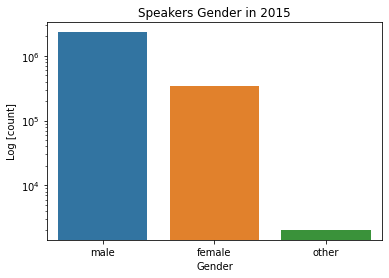

In [15]:
ax = sns.countplot(x="gen", data=dff)
ax.set(xlabel='Gender', ylabel='Log [count]')
ax.set_title('Speakers Gender in 2015')
plt.yscale("log")
plt.show()


In [ ]:
# reading con concadate all csv gender files to create one dataframe
colnames = ['qids','quoteid','gender']
path = r'C:\ada-2021-project-allg-main' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, header = None, index_col=0, names = colnames)
    li.append(df)

allyears = pd.concat(li, axis=0, ignore_index=True)

allyears['gender'].value_counts(dropna=False)